The following example shows how to log data for training. The log data will be saved into data/training folder

[PropellerLookupTable] Reading data from ..\inflow_model\lookup_table\apc_8x6_with_trail_refine.yaml
is_sinusoidal_wind:  False
phi net input output fields:
input {'position': [0, 1, 2], 'q': [0, 1, 2, 3], 'v': [0, 1, 2], 'omega': [0, 1, 2], 'f_ctrl_input': [2], 'torque_ctrl_input': [0, 1, 2], 'rotor_0_rotation_spd': None, 'rotor_1_rotation_spd': None, 'rotor_2_rotation_spd': None, 'rotor_3_rotation_spd': None}
label {'f_disturb': [0, 1, 2]}
simple net input output fields:
input {'q': [0, 1, 2, 3], 'v': [0, 1, 2], 'omega': [0, 1, 2], 'rotor_0_local_wind_velocity': [0, 1, 2], 'rotor_1_local_wind_velocity': [0, 1, 2], 'rotor_2_local_wind_velocity': [0, 1, 2], 'rotor_3_local_wind_velocity': [0, 1, 2], 'rotor_0_rotation_spd': None, 'rotor_1_rotation_spd': None, 'rotor_2_rotation_spd': None, 'rotor_3_rotation_spd': None}
label {'f_residual': [0, 1, 2]}
[PropellerLookupTable] Reading data from ..\inflow_model\lookup_table\apc_8x6_fitted2.yaml
DroneController: using inflow model:  True
DroneC

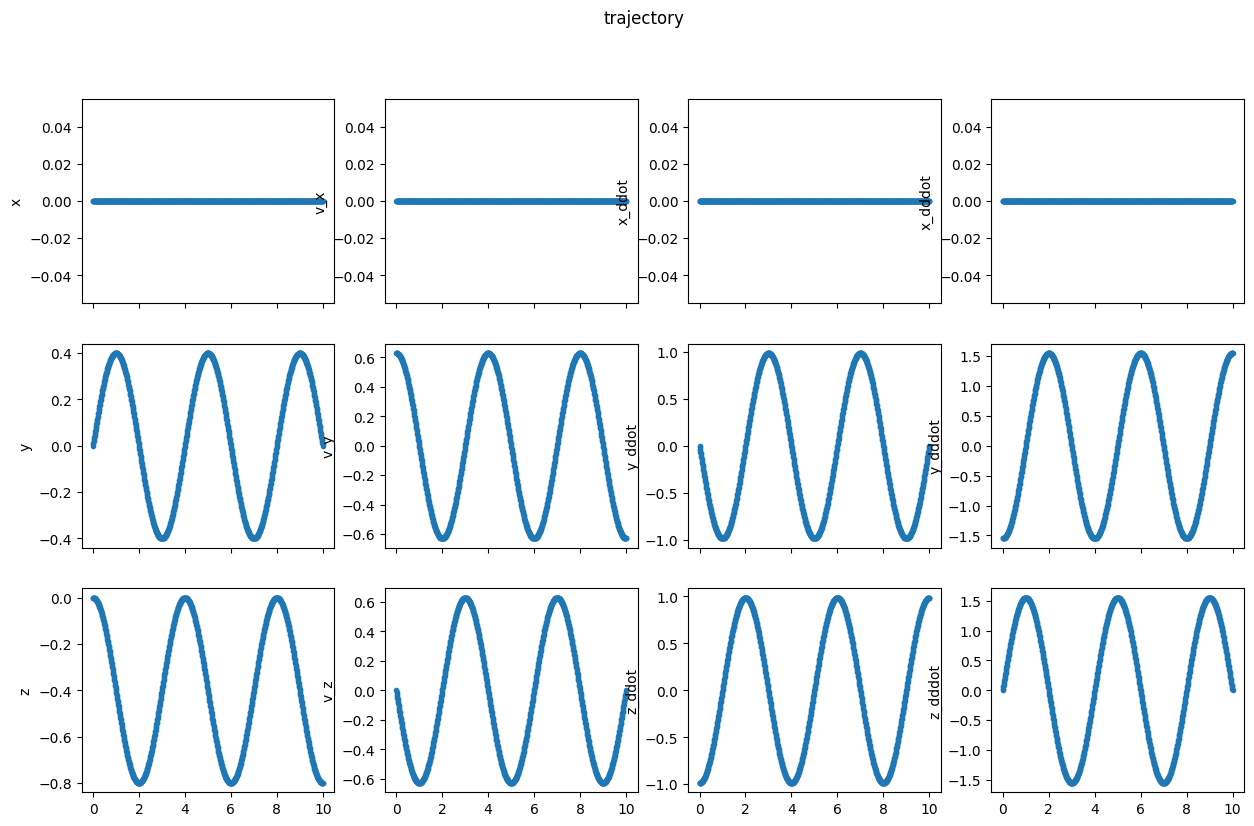

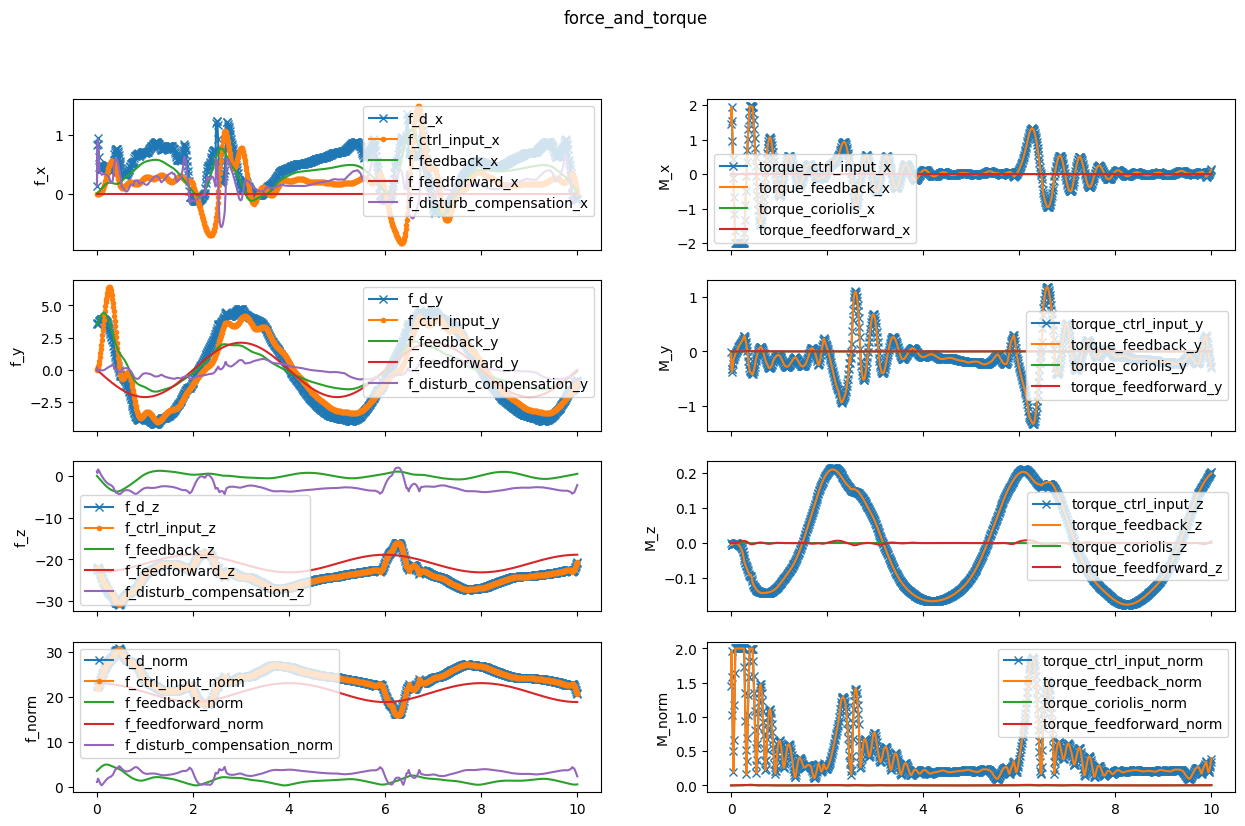

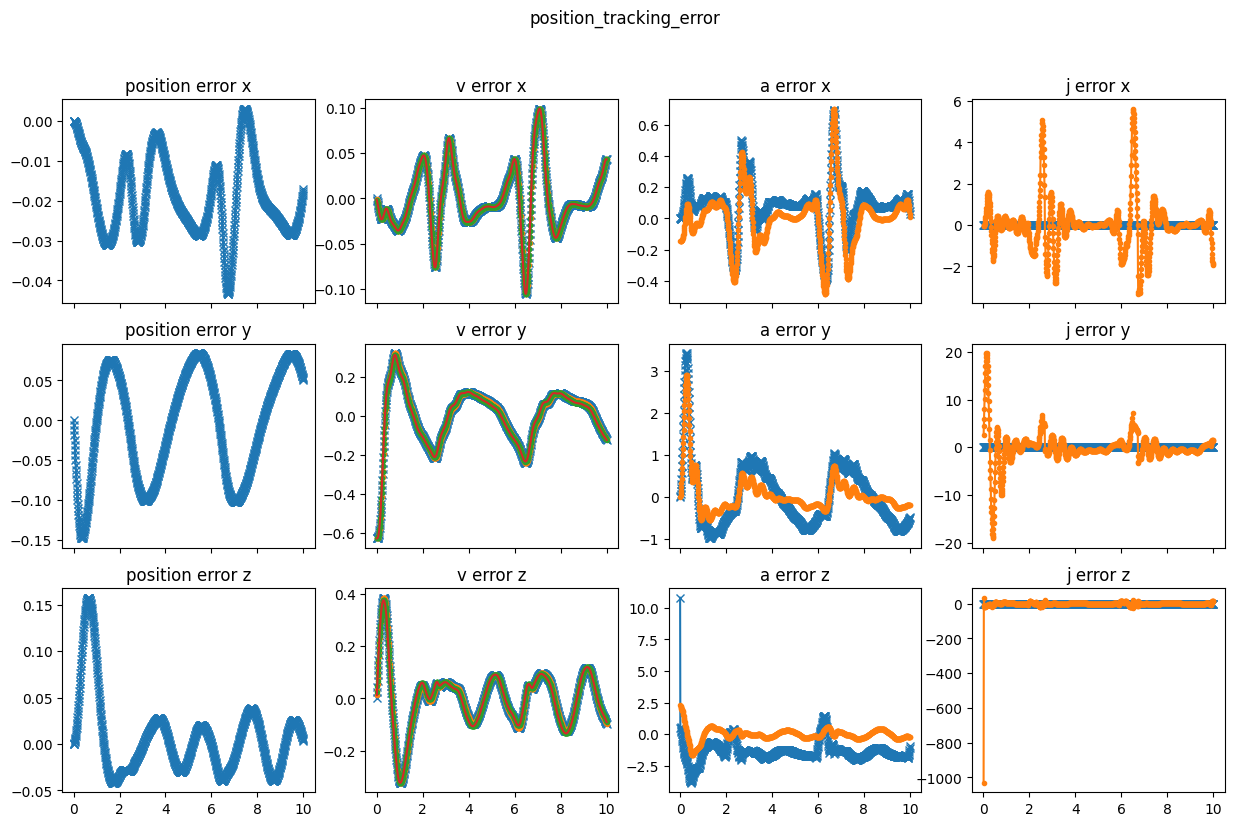

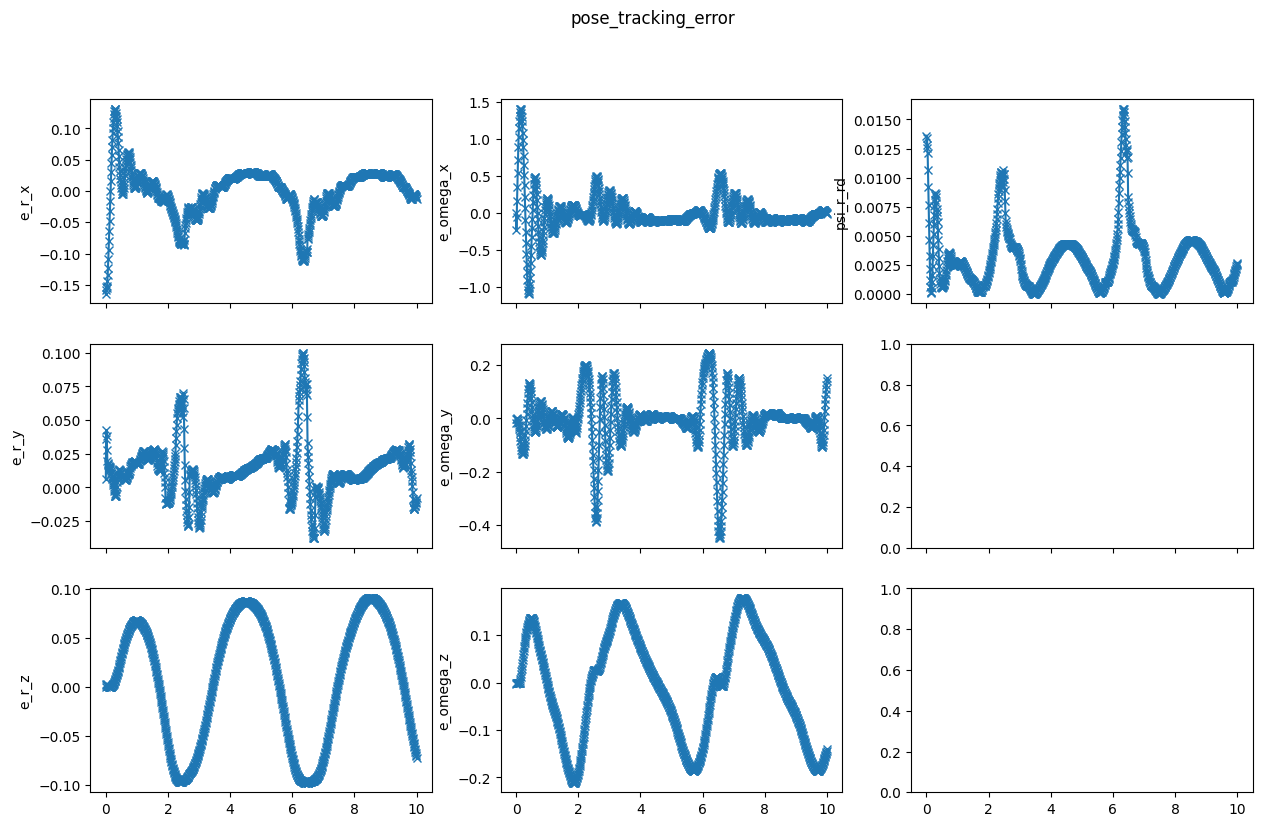

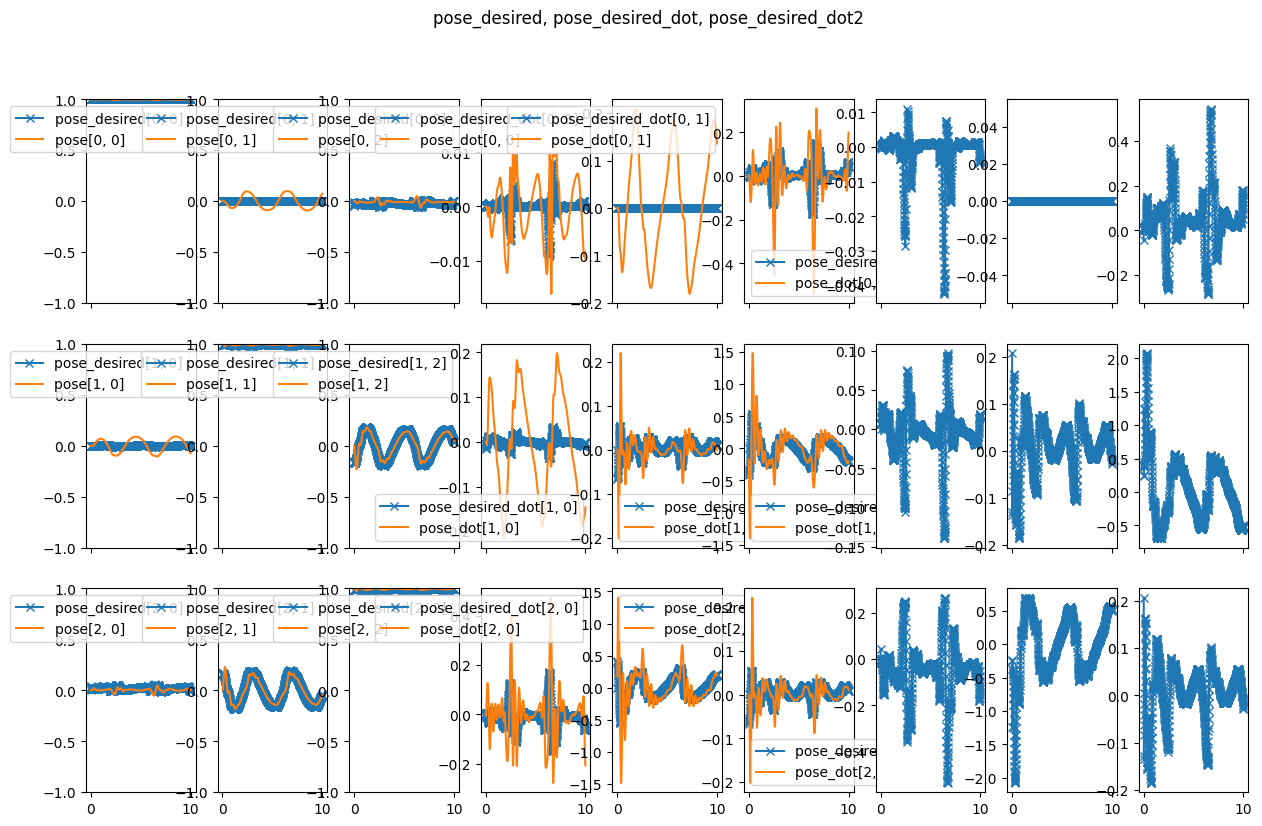

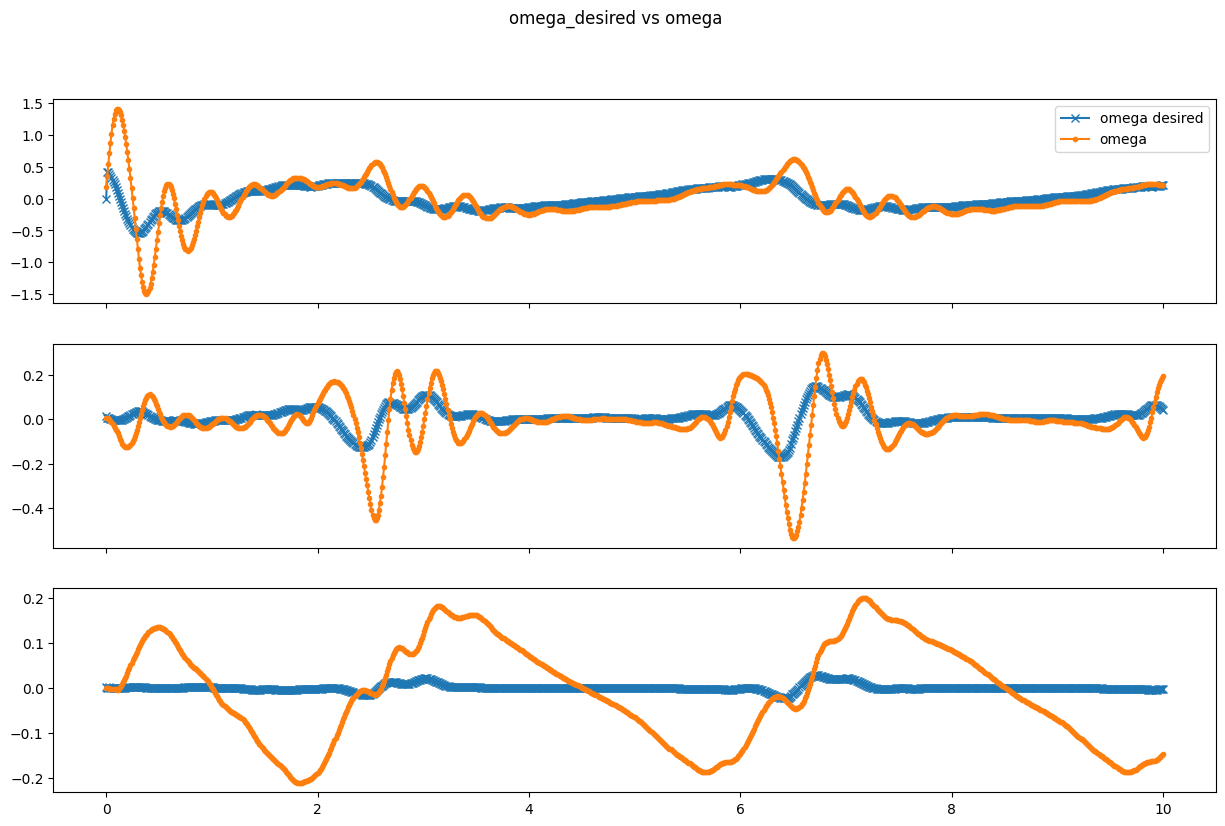

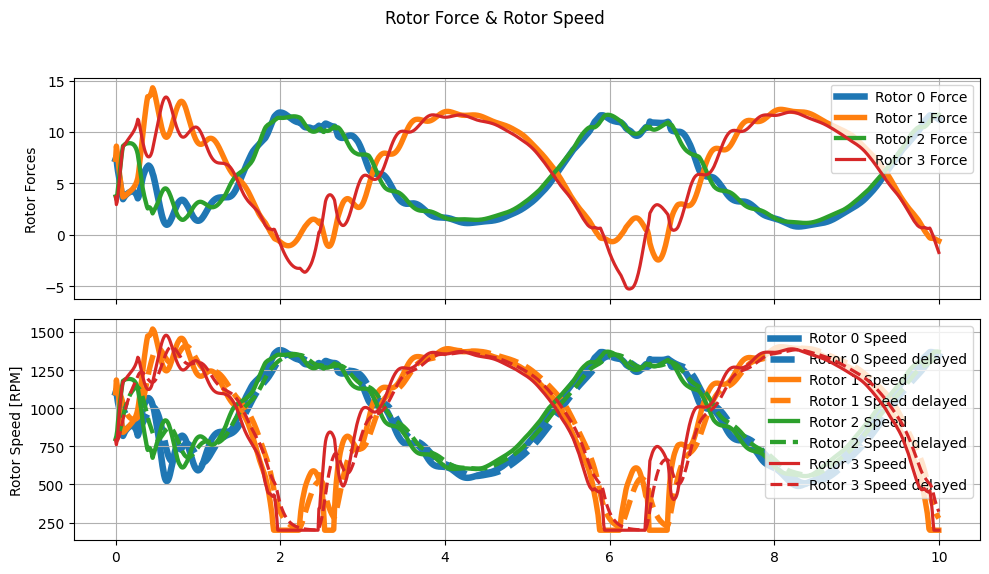

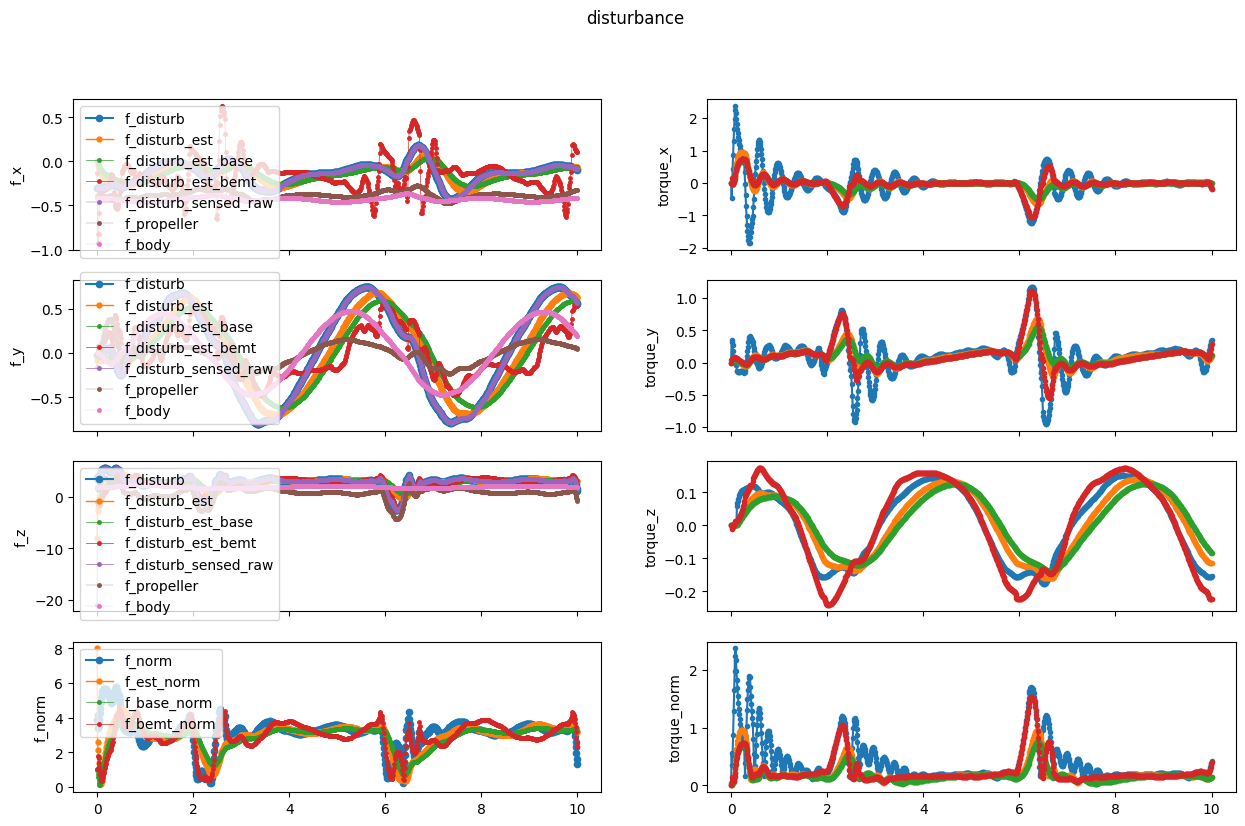

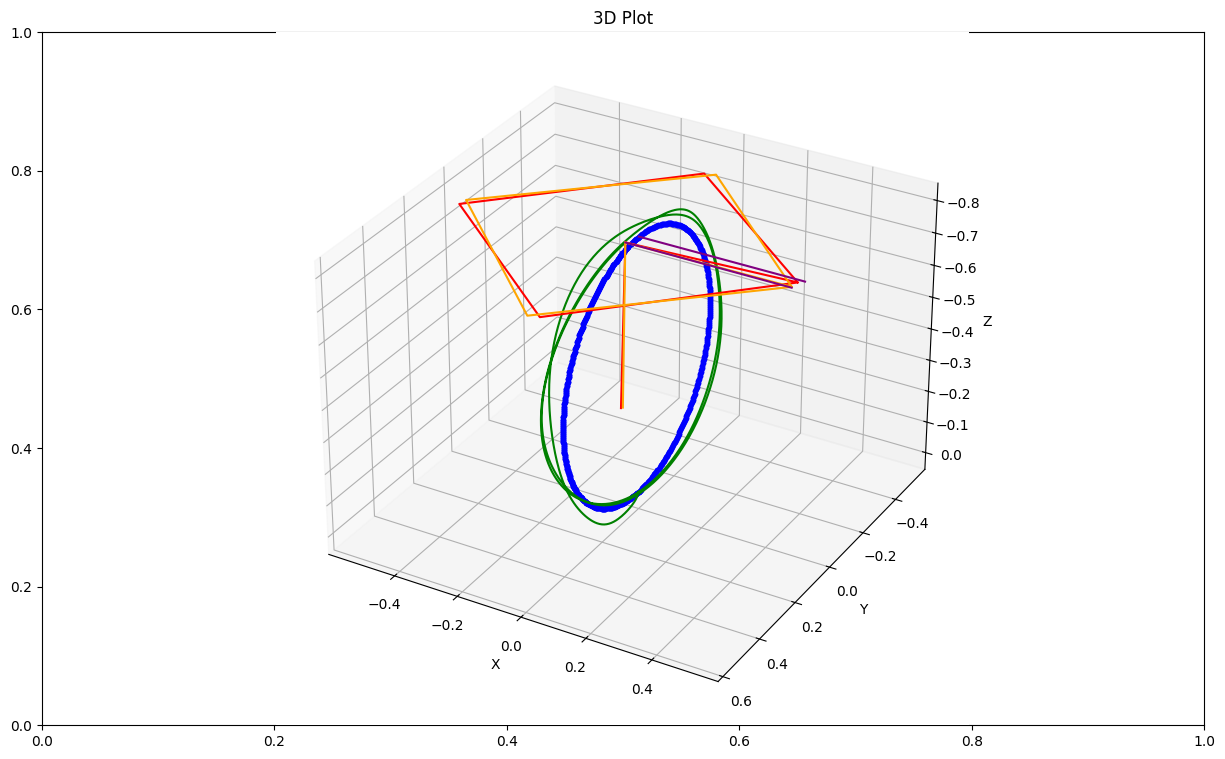

In [1]:
# %matplotlib tk
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import manager
import drone.trajectory
import drone.disturbance_model

plt.rcParams['figure.figsize'] = [15, 9]

wall_distance = 0.5
# wall_distance = 10.0
wind_speed_x = -9.0
wind_speed_y = 0.0
wind_speed_z = -9.0

sim_test = manager.Manager()
# model = drone.disturbance_model.WindEffectNearWall(wall_origin=np.array([-wall_distance, 0, 0]), 
#                                                     u_free = np.array([wind_speed_x, wind_speed_y, wind_speed_z]))
model = drone.disturbance_model.AggregatedDisturbance(wall_origin=np.array([-wall_distance, 0, 0]), 
                                                    u_free = np.array([wind_speed_x, wind_speed_y, wind_speed_z]))
# model = drone.disturbance_model.Free()    # debug only
# trajectory=drone.trajectory.RandomWaypointsInConstrainedSpace(200, False)
# trajectory = drone.trajectory.Figure8(5)
trajectory= drone.trajectory.CircleYZ()
# trajectory = drone.trajectory.Hover()
sim_test.set_up(disturbance_model=model, trajectory=trajectory)

sim_test.run(10.0) 
# sim_test.save_result_as_csv('test')
sim_test.plot()
plt.show()

To compare the desired pose and actual pose, use the following command.

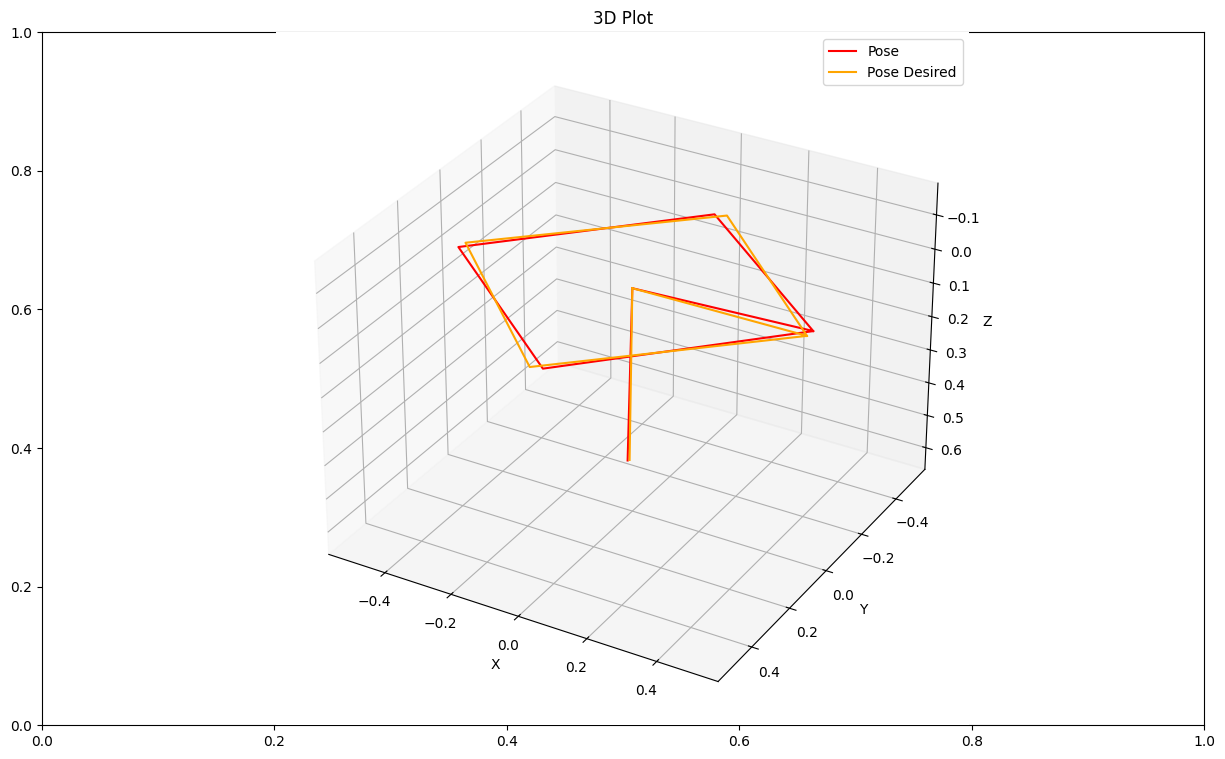

In [2]:
sim_test.result.plot_pose_in_given_time(sim_test.logger.output, 15.0)

Pop out a specific figure to zoom in.

In [3]:
%matplotlib tk
sim_test.result.plot_disturbance_force(sim_test.logger.output)
sim_test.result.plot_rotor(sim_test.logger.output)
sim_test.result.plot_3d_trace(sim_test.logger.output)
# sim_test.plot()

Summarize rms metrics.

In [4]:
rms_x = np.sqrt(np.mean(np.square(sim_test.logger.output["e_x"][:, 0])))
rms_y = np.sqrt(np.mean(np.square(sim_test.logger.output["e_x"][:, 1])))
rms_z = np.sqrt(np.mean(np.square(sim_test.logger.output["e_x"][:, 2])))
rms_norm = np.sqrt(np.mean(sim_test.logger.output["e_x"][:, 0]**2 + sim_test.logger.output["e_x"][:, 1]**2 + sim_test.logger.output["e_x"][:, 2]**2))
print(f"RMS position error: \nx: {rms_x}, \ny: {rms_y}, \nz: {rms_z}, \nnorm: {rms_norm}")

RMS position error: 
x: 0.02146752762851668, 
y: 0.06887039175615083, 
z: 0.043152750449229296, 
norm: 0.08406036803666919
